# 以PCA分析文章的性質

In [8]:
import pandas as pd
import numpy as np
from collections import Counter

In [3]:
April_data = pd.read_csv("April_Gossiping_Data.csv")
April_data.head()

,Unnamed: 0,Date,Push,Title,Author,Link,Push_Count,Content
0,0,4/01,NaN,[問卦] 八卦板取年號該取啥,med5566,/bbs/Gossiping/M.1554113138.A.5BC.html,17,各位八卦鄉民們晚安\n\n年號通常有皇帝對於未來期許的意味\n\n如果八卦板也來年號紀元\n...
1,1,4/01,10,[新聞] 高雄簽13億無法律效力MOU 陳吉仲：農委,qqq87112,/bbs/Gossiping/M.1554113163.A.4CE.html,27,1.媒體來源:\n\n\n自由\n2.完整新聞標題:\n\n高雄簽13億無法律效力MOU 陳...
2,2,4/01,5,[問卦] 有沒有雨衣只是把雨水集中到鞋子裡的八卦,ken0062,/bbs/Gossiping/M.1554113195.A.80D.html,27,台灣人最愛騎機車，\n\n一遇到下雨就只能穿雨衣，\n\n但雨衣的設計根本就沒有辦法騎機車，...
3,3,4/01,5,[新聞] 紐航將開通直飛首爾航班 機上Wifi將免費,FreeWiFi,/bbs/Gossiping/M.1554113228.A.0A0.html,10,大紀元\n\n\n紐航將開通直飛首爾航班 機上Wifi將免費\n\n\n【大紀元2019年0...
4,4,4/01,NaN,[問卦] 有沒有賣國旗的外國人的八卦,WWTDD,/bbs/Gossiping/M.1554113273.A.A5E.html,8,之前有個自稱聾啞的外國人拿著國旗給路人\n路人如果伸手拿了 就會拿出張紙寫一支國旗100塊...


In [4]:
#篩選有九二共識的文章

bool = April_data["Content"].str.contains('九二共識')
select_data = April_data[bool]
select_data.head()

,Unnamed: 0,Date,Push,Title,Author,Link,Push_Count,Content
289,289,4/01,NaN,Re: [新聞] 最新民調／民眾反撲！韓國瑜赴中挨轟後,wang19980531,/bbs/Gossiping/M.1554120610.A.42C.html,1,整體還是要看滿意度才準，\n因為沒報備陸委會這點確實不太恰當，\n但也因此做這份民調不能表示...
297,297,4/01,4,Re: [新聞] 陳明通澄清：說「禽獸」 並非針對韓國瑜,Sinreigensou,/bbs/Gossiping/M.1554120937.A.6B8.html,26,: 大陸委員會表示，陳主委接受寶島聯播網「新聞放輕鬆」節目專訪時，提醒國人在面對中\n: 共...
400,400,4/01,2,Re: [新聞] 韓國瑜：台灣人民無法接受一國兩制,patiger,/bbs/Gossiping/M.1554123948.A.66A.html,6,上次這樣說那個被說成台獨\n\n還要洗門風\n\n如果中國沒有叫韓出來洗門風\n\n大概表示...
428,428,4/01,1,Re: [新聞] T台六都市長民調出爐！鄭文燦居冠 韓國1,kylinweapon,/bbs/Gossiping/M.1554124890.A.0E6.html,5,因為柯師傅一直露出馬腳\n\n1.五大弊案變五大案\n2.說九二共識是下跪投降，結果現在說不...
436,436,4/01,2,[問卦] 如何跟親戚解釋九二共識與一國兩制,leo755269,/bbs/Gossiping/M.1554125313.A.749.html,19,是這樣啦，小魯最近跟親戚一起吃飯，酒酣耳熱之際，親戚說\n\n「我一生熱愛中華民國！ 支持中...


In [34]:
bool = select_data["Title"].str.contains('Re')
bool_list = list(bool)
#bool_list
bool_list_0 = [not i for i in bool_list]
#bool_list_0


clear_data = select_data[bool_list_0]
clear_data.fillna(0)

,Unnamed: 0,Date,Push,Title,Author,Link,Push_Count,Content
436,436,4/01,2,[問卦] 如何跟親戚解釋九二共識與一國兩制,leo755269,/bbs/Gossiping/M.1554125313.A.749.html,19,是這樣啦，小魯最近跟親戚一起吃飯，酒酣耳熱之際，親戚說\n\n「我一生熱愛中華民國！ 支持中...
462,462,4/01,0,[新聞] 悟覺妙天︰兩岸都是一家人,ice80712,/bbs/Gossiping/M.1554126344.A.B21.html,62,1.媒體來源:\n\n中時\n\n2.完整新聞標題:\n\n悟覺妙天︰兩岸都是一家人\n\n...
570,570,4/01,0,[臉書] 賴清德 4/1 異中求同,girl55665566,/bbs/Gossiping/M.1554129634.A.083.html,38,臉書卦點說明：\n\n曾經說出愛滋病主因是男男同性戀的賴清德院長\n\nhttps://i....
1044,1044,4/02,0,[新聞] 議會交鋒 市長打趴陳致中,Pattaya,/bbs/Gossiping/M.1554162929.A.ED2.html,48,議會交鋒 市長打趴陳致中\n\n\n高雄市長韓國瑜與市議員陳致中繼外患罪與外遇罪事件交火後，...
1101,1101,4/02,0,[新聞] 學者：陳明通當然不是罵韓國瑜 是罵好多,Salcea,/bbs/Gossiping/M.1554166822.A.08B.html,21,學者：陳明通當然不是罵韓國瑜 是罵好多台灣人\n\n聯合報 記者雷光涵╱即時報導\n\n陸委...
1198,1198,4/02,0,[新聞] 【處理藍綠惡鬥】盡力團結台灣 賴清德,glissando,/bbs/Gossiping/M.1554170639.A.FDC.html,48,好熟悉呀!看來已經是柯p的形狀惹!\n唯一支持賴柯配!\n\n上報 陳昱婷 2019年04月...
1655,1655,4/02,XX,[新聞] 解放軍機越線挑釁台灣主權 吳敦義籲：蔡,sighm,/bbs/Gossiping/M.1554183901.A.EF0.html,293,解放軍機越線挑釁台灣主權 吳敦義籲：蔡政府應和平對待中國\nhttps://www.upme...
1782,1782,4/02,12,[新聞] 綠圍剿 韓國瑜：反對一國兩制 進中聯辦,xingting,/bbs/Gossiping/M.1554188245.A.1D0.html,39,1.媒體來源:\n\n蘋果日報\n\n2.完整新聞標題:\n\n綠圍剿 韓國瑜：反對一國兩制...
1841,1841,4/02,X4,[新聞] 追求統一挺「一國兩制」黃智賢：這樣才能,word2012,/bbs/Gossiping/M.1554190561.A.690.html,93,1.媒體來源:\nTVBS 編輯 林保宏 報導\n\n2.完整新聞標題:\n追求統一挺「一國...
1989,1989,4/02,0,[新聞] 周志懷：一國兩制台灣方案金馬可先行,SongHyekyo,/bbs/Gossiping/M.1554195933.A.E1F.html,34,1.媒體來源:\n聯合報 記者賴錦宏╱即時報導\n\n2.完整新聞標題:\n周志懷：一國兩制...


In [31]:
len(clear_data)

225

In [35]:
count = Counter(clear_data["Push"])
count

Counter({'2': 9,
         nan: 56,
         'XX': 5,
         '12': 1,
         'X4': 7,
         'X2': 10,
         'X1': 21,
         '爆': 21,
         '1': 15,
         'X3': 8,
         '5': 8,
         '9': 4,
         '7': 6,
         '4': 4,
         'X5': 3,
         'X6': 3,
         '38': 3,
         '6': 7,
         '11': 4,
         '17': 2,
         '16': 2,
         '96': 1,
         '10': 4,
         '19': 1,
         '21': 2,
         '75': 1,
         '34': 1,
         '42': 2,
         '43': 1,
         '3': 2,
         '40': 1,
         '8': 3,
         '65': 1,
         '23': 2,
         '35': 1,
         '50': 1,
         '99': 1,
         '15': 1})

# MAX

In [43]:
max_df_1 = clear_data[clear_data["Push"] == "爆"]
max_df_2 = clear_data[clear_data["Push"] == '99']
max_df_3 = clear_data[clear_data["Push"] == '96']
max_df = pd.concat([max_df_1 , max_df_2 , max_df_3] , axis = 0 , ignore_index = True)
max_df.head()

,Unnamed: 0,Date,Push,Title,Author,Link,Push_Count,Content
0,3849,4/03,爆,[爆卦] 集資在美國登報呼籲議員連署挺台法案,address0115,/bbs/Gossiping/M.1554274008.A.CBE.html,286,感謝大家的幫忙！我們完全沒有預料到可以真的在一天內就達標。\n在看募款金額累計的時候其實是很...
1,8126,4/05,爆,[新聞] 民問「台獨有什麼好處？」 蔡英文：台灣,gasara,/bbs/Gossiping/M.1554460938.A.4F4.html,1087,民問「台獨有什麼好處？」 蔡英文：台灣哪有獨立問題\n\n\n\n\n2019-04-05 ...
2,8355,4/05,爆,[新聞] 蔡英文:水果品質好就賣得出去 跟九二共識,Wojnarowski,/bbs/Gossiping/M.1554468581.A.8DA.html,230,自由\n\n蔡英文：水果品質好就賣得出去 跟九二共識一點關係都沒有\n\n［記者黃淑莉／雲林...
3,8396,4/05,爆,[爆卦] 小英總統座談逐字稿（土庫場）,mp4vu06,/bbs/Gossiping/M.1554469935.A.D77.html,173,小英總統雲林座談＠土庫順天宮旁市場\n\n土庫鎮長：今天非常高興總統來土庫，總統握手恭喜我當...
4,10827,4/07,爆,[爆卦] 網軍買粉專？沈伯洋揭中國從俄學來的73招,lorleninmam,/bbs/Gossiping/M.1554567894.A.5D8.html,429,新頭殼有的網路報導，小魯就不貼了！\nhttp://tinyurl.com/y3s3sv8c...


In [44]:
len(max_df)

23

In [45]:
#max_index

max_list = [ ]
max_list.append("Max "*23)

for i in max_list:
    max_i_split = i.split(" " , 23)
    
del max_i_split[-1]

len(max_i_split)

23

In [48]:
max_df["Index"] = max_i_split
max_df.head()

,Unnamed: 0,Date,Push,Title,Author,Link,Push_Count,Content,Index
0,3849,4/03,爆,[爆卦] 集資在美國登報呼籲議員連署挺台法案,address0115,/bbs/Gossiping/M.1554274008.A.CBE.html,286,感謝大家的幫忙！我們完全沒有預料到可以真的在一天內就達標。\n在看募款金額累計的時候其實是很...,Max
1,8126,4/05,爆,[新聞] 民問「台獨有什麼好處？」 蔡英文：台灣,gasara,/bbs/Gossiping/M.1554460938.A.4F4.html,1087,民問「台獨有什麼好處？」 蔡英文：台灣哪有獨立問題\n\n\n\n\n2019-04-05 ...,Max
2,8355,4/05,爆,[新聞] 蔡英文:水果品質好就賣得出去 跟九二共識,Wojnarowski,/bbs/Gossiping/M.1554468581.A.8DA.html,230,自由\n\n蔡英文：水果品質好就賣得出去 跟九二共識一點關係都沒有\n\n［記者黃淑莉／雲林...,Max
3,8396,4/05,爆,[爆卦] 小英總統座談逐字稿（土庫場）,mp4vu06,/bbs/Gossiping/M.1554469935.A.D77.html,173,小英總統雲林座談＠土庫順天宮旁市場\n\n土庫鎮長：今天非常高興總統來土庫，總統握手恭喜我當...,Max
4,10827,4/07,爆,[爆卦] 網軍買粉專？沈伯洋揭中國從俄學來的73招,lorleninmam,/bbs/Gossiping/M.1554567894.A.5D8.html,429,新頭殼有的網路報導，小魯就不貼了！\nhttp://tinyurl.com/y3s3sv8c...,Max


# MIN

In [49]:
count

Counter({'2': 9,
         nan: 56,
         'XX': 5,
         '12': 1,
         'X4': 7,
         'X2': 10,
         'X1': 21,
         '爆': 21,
         '1': 15,
         'X3': 8,
         '5': 8,
         '9': 4,
         '7': 6,
         '4': 4,
         'X5': 3,
         'X6': 3,
         '38': 3,
         '6': 7,
         '11': 4,
         '17': 2,
         '16': 2,
         '96': 1,
         '10': 4,
         '19': 1,
         '21': 2,
         '75': 1,
         '34': 1,
         '42': 2,
         '43': 1,
         '3': 2,
         '40': 1,
         '8': 3,
         '65': 1,
         '23': 2,
         '35': 1,
         '50': 1,
         '99': 1,
         '15': 1})

In [54]:
min_df = pd.DataFrame()
boo_x_list = ['XX','X4' ,'X2','X3','X1', 'X5', 'X6']
for i in boo_x_list:
    min_df = pd.concat([min_df , clear_data[clear_data["Push"] == i]] , axis = 0 , ignore_index = True)
    
min_df.head()

,Unnamed: 0,Date,Push,Title,Author,Link,Push_Count,Content
0,1655,4/02,XX,[新聞] 解放軍機越線挑釁台灣主權 吳敦義籲：蔡,sighm,/bbs/Gossiping/M.1554183901.A.EF0.html,293,解放軍機越線挑釁台灣主權 吳敦義籲：蔡政府應和平對待中國\nhttps://www.upme...
1,19494,4/10,XX,[新聞]「接地氣的力量」韓國瑜哈佛演講主題曝光!,Herrington,/bbs/Gossiping/M.1554907017.A.88F.html,287,1.媒體來源:\n聯合報 記者蔡孟妤╱即時報導\n\n3.完整新聞標題:\n「接地氣的力量」...
2,22308,4/12,XX,[新聞] 哈佛演講，韓國瑜嗆小英兩岸政策空洞,nicholas0406,/bbs/Gossiping/M.1555024382.A.E5D.html,442,1.媒體來源: 中時電子報\n\n\n2.記者署名 林宏聰\n\n\n3.完整新聞標題: 哈...
3,22351,4/12,XX,[新聞]韓哈佛演講:蔡政府的暴力流血非人民所期望,zzyyxx77,/bbs/Gossiping/M.1555028009.A.036.html,407,韓哈佛演講：蔡政府的暴力流血非人民所期望\n\n08:00 2019/04/12 中時電子報...
4,23574,4/12,XX,[新聞] 接地氣的力量！韓國瑜哈佛英文演講全文曝,ntlutw,/bbs/Gossiping/M.1555068032.A.94B.html,280,1.媒體來源:東森\n\n2.記者署名:周俐萱\n\n3.完整新聞標題:接地氣的力量！韓國瑜...


In [55]:
min_list = [ ]
min_list.append("Min "*57)

for i in min_list:
    min_i_split = i.split(" " , 57)
    
del min_i_split[-1]

len(min_i_split)

57

In [57]:
min_df["Index"] = min_i_split
min_df.head()

,Unnamed: 0,Date,Push,Title,Author,Link,Push_Count,Content,Index
0,1655,4/02,XX,[新聞] 解放軍機越線挑釁台灣主權 吳敦義籲：蔡,sighm,/bbs/Gossiping/M.1554183901.A.EF0.html,293,解放軍機越線挑釁台灣主權 吳敦義籲：蔡政府應和平對待中國\nhttps://www.upme...,Min
1,19494,4/10,XX,[新聞]「接地氣的力量」韓國瑜哈佛演講主題曝光!,Herrington,/bbs/Gossiping/M.1554907017.A.88F.html,287,1.媒體來源:\n聯合報 記者蔡孟妤╱即時報導\n\n3.完整新聞標題:\n「接地氣的力量」...,Min
2,22308,4/12,XX,[新聞] 哈佛演講，韓國瑜嗆小英兩岸政策空洞,nicholas0406,/bbs/Gossiping/M.1555024382.A.E5D.html,442,1.媒體來源: 中時電子報\n\n\n2.記者署名 林宏聰\n\n\n3.完整新聞標題: 哈...,Min
3,22351,4/12,XX,[新聞]韓哈佛演講:蔡政府的暴力流血非人民所期望,zzyyxx77,/bbs/Gossiping/M.1555028009.A.036.html,407,韓哈佛演講：蔡政府的暴力流血非人民所期望\n\n08:00 2019/04/12 中時電子報...,Min
4,23574,4/12,XX,[新聞] 接地氣的力量！韓國瑜哈佛英文演講全文曝,ntlutw,/bbs/Gossiping/M.1555068032.A.94B.html,280,1.媒體來源:東森\n\n2.記者署名:周俐萱\n\n3.完整新聞標題:接地氣的力量！韓國瑜...,Min


# TEST

In [61]:
test_df = pd.read_excel('test_file_2.xlsx')
test_df

,Date,Push,Title,Author,Link,Push_Count,Content,Index
0,2019-01-03,X2,「九二共識是定海神針」 韓國瑜拋出「2個不要懷疑」,tenfu (富哥),https://www.ptt.cc/bbs/Gossiping/M.1546488030....,31,ettoday\n\n「九二共識是定海神針」 韓國瑜拋出「2個不要懷疑」\n\n大陸國家主席...,test_file


# Merge

In [63]:
merge_df = pd.DataFrame()
merge_df = pd.concat([max_df , min_df , test_df] , axis = 0 , ignore_index = True)
merge_df.head()

/Users/shulilu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Author,Content,Date,Index,Link,Push,Push_Count,Title,Unnamed: 0
0,address0115,感謝大家的幫忙！我們完全沒有預料到可以真的在一天內就達標。\n在看募款金額累計的時候其實是很...,4/03,Max,/bbs/Gossiping/M.1554274008.A.CBE.html,爆,286,[爆卦] 集資在美國登報呼籲議員連署挺台法案,3849.0
1,gasara,民問「台獨有什麼好處？」 蔡英文：台灣哪有獨立問題\n\n\n\n\n2019-04-05 ...,4/05,Max,/bbs/Gossiping/M.1554460938.A.4F4.html,爆,1087,[新聞] 民問「台獨有什麼好處？」 蔡英文：台灣,8126.0
2,Wojnarowski,自由\n\n蔡英文：水果品質好就賣得出去 跟九二共識一點關係都沒有\n\n［記者黃淑莉／雲林...,4/05,Max,/bbs/Gossiping/M.1554468581.A.8DA.html,爆,230,[新聞] 蔡英文:水果品質好就賣得出去 跟九二共識,8355.0
3,mp4vu06,小英總統雲林座談＠土庫順天宮旁市場\n\n土庫鎮長：今天非常高興總統來土庫，總統握手恭喜我當...,4/05,Max,/bbs/Gossiping/M.1554469935.A.D77.html,爆,173,[爆卦] 小英總統座談逐字稿（土庫場）,8396.0
4,lorleninmam,新頭殼有的網路報導，小魯就不貼了！\nhttp://tinyurl.com/y3s3sv8c...,4/07,Max,/bbs/Gossiping/M.1554567894.A.5D8.html,爆,429,[爆卦] 網軍買粉專？沈伯洋揭中國從俄學來的73招,10827.0


# PCA

In [66]:
corpus = merge_df["Content"].values.tolist()
#corpus

In [67]:
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer()  
X = vectorizer.fit_transform(corpus)  
word = vectorizer.get_feature_names()  

from sklearn.feature_extraction.text import TfidfTransformer  
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X)

In [68]:
len(corpus)
features = tfidf.toarray()
labels = merge_df['Index'].values
labels

array(['Max', 'Max', 'Max', 'Max', 'Max', 'Max', 'Max', 'Max', 'Max',
       'Max', 'Max', 'Max', 'Max', 'Max', 'Max', 'Max', 'Max', 'Max',
       'Max', 'Max', 'Max', 'Max', 'Max', 'Min', 'Min', 'Min', 'Min',
       'Min', 'Min', 'Min', 'Min', 'Min', 'Min', 'Min', 'Min', 'Min',
       'Min', 'Min', 'Min', 'Min', 'Min', 'Min', 'Min', 'Min', 'Min',
       'Min', 'Min', 'Min', 'Min', 'Min', 'Min', 'Min', 'Min', 'Min',
       'Min', 'Min', 'Min', 'Min', 'Min', 'Min', 'Min', 'Min', 'Min',
       'Min', 'Min', 'Min', 'Min', 'Min', 'Min', 'Min', 'Min', 'Min',
       'Min', 'Min', 'Min', 'Min', 'Min', 'Min', 'Min', 'Min',
       'test_file'], dtype=object)

In [72]:
# PCA
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
transData = pca.fit_transform(features, labels)
type(transData)
merge_df['pca1'] = pd.DataFrame(transData[:,0])
merge_df['pca2'] = pd.DataFrame(transData[:,1])
merge_df.head()

,Author,Content,Date,Index,Link,Push,Push_Count,Title,Unnamed: 0,pca1,pca2
0,address0115,感謝大家的幫忙！我們完全沒有預料到可以真的在一天內就達標。\n在看募款金額累計的時候其實是很...,4/03,Max,/bbs/Gossiping/M.1554274008.A.CBE.html,爆,286,[爆卦] 集資在美國登報呼籲議員連署挺台法案,3849.0,0.143652,0.090685
1,gasara,民問「台獨有什麼好處？」 蔡英文：台灣哪有獨立問題\n\n\n\n\n2019-04-05 ...,4/05,Max,/bbs/Gossiping/M.1554460938.A.4F4.html,爆,1087,[新聞] 民問「台獨有什麼好處？」 蔡英文：台灣,8126.0,-0.075163,-0.046863
2,Wojnarowski,自由\n\n蔡英文：水果品質好就賣得出去 跟九二共識一點關係都沒有\n\n［記者黃淑莉／雲林...,4/05,Max,/bbs/Gossiping/M.1554468581.A.8DA.html,爆,230,[新聞] 蔡英文:水果品質好就賣得出去 跟九二共識,8355.0,-0.080550,-0.057831
3,mp4vu06,小英總統雲林座談＠土庫順天宮旁市場\n\n土庫鎮長：今天非常高興總統來土庫，總統握手恭喜我當...,4/05,Max,/bbs/Gossiping/M.1554469935.A.D77.html,爆,173,[爆卦] 小英總統座談逐字稿（土庫場）,8396.0,-0.067056,-0.066001
4,lorleninmam,新頭殼有的網路報導，小魯就不貼了！\nhttp://tinyurl.com/y3s3sv8c...,4/07,Max,/bbs/Gossiping/M.1554567894.A.5D8.html,爆,429,[爆卦] 網軍買粉專？沈伯洋揭中國從俄學來的73招,10827.0,-0.085280,-0.067212


/Users/shulilu/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


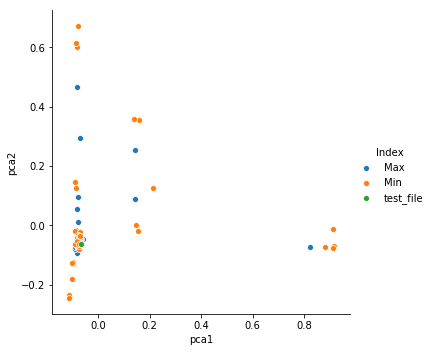

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(x_vars=['pca1'], y_vars=['pca2'], data=merge_df, hue="Index", size=5)